In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [77]:
df = pd.read_csv('nse.csv')

In [78]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1235 non-null   object 
 1   Open                  1235 non-null   float64
 2   High                  1235 non-null   float64
 3   Low                   1235 non-null   float64
 4   Last                  1235 non-null   float64
 5   Close                 1235 non-null   float64
 6   Total Trade Quantity  1235 non-null   float64
 7   Turnover (Lacs)       1235 non-null   float64
dtypes: float64(7), object(1)
memory usage: 77.3+ KB


In [80]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03,1235.000000
mean,168.954858,171.429069,166.402308,168.736356,168.731053,2.604151e+06,4843.166502
std,51.499145,52.436761,50.542919,51.587384,51.544928,2.277028e+06,5348.919832
min,103.000000,104.600000,100.000000,102.600000,102.650000,1.001800e+05,128.040000
25%,137.550000,138.925000,135.250000,137.175000,137.225000,1.284482e+06,1801.035000
50%,151.500000,153.250000,149.500000,151.200000,151.100000,1.964885e+06,3068.510000
75%,169.000000,172.325000,166.700000,169.100000,169.500000,3.095788e+06,5852.600000
max,327.700000,328.750000,321.650000,325.950000,325.750000,2.919102e+07,55755.080000


In [81]:
df["Date"] = pd.to_datetime(df.Date, format="%Y-%m-%d")

In [82]:
df.set_index("Date", inplace=True)

In [83]:
df.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


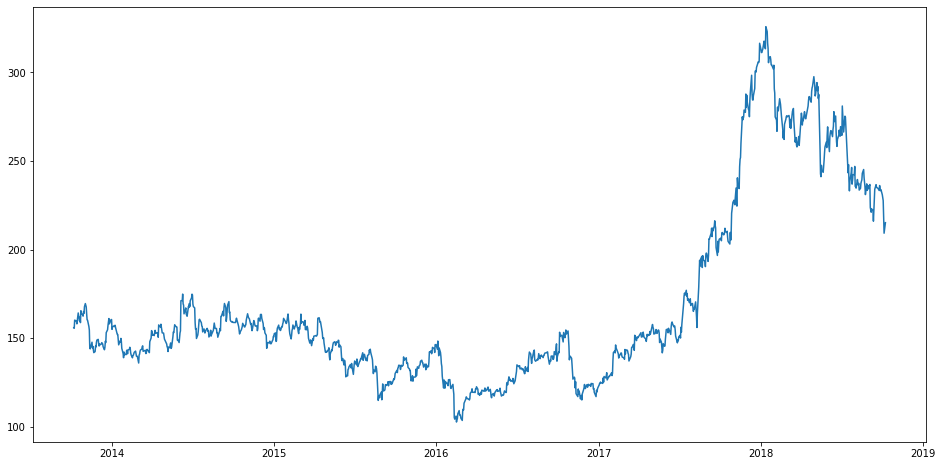

In [84]:
plt.figure(figsize=(16,8))
plt.plot(df["Close"], label="Close Price History")

In [85]:
df.sort_index(ascending=True, axis=0, inplace=True)

In [86]:
df.reset_index(inplace=True)

In [87]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2013-10-08,157.00,157.80,155.20,155.8,155.80,1720413.0,2688.94
1,2013-10-09,155.70,158.20,154.15,155.3,155.55,2049580.0,3204.49
2,2013-10-10,156.00,160.80,155.85,160.3,160.15,3124853.0,4978.80
3,2013-10-11,161.15,163.45,159.00,159.8,160.05,1880046.0,3030.76
4,2013-10-14,160.85,161.45,157.70,159.3,159.45,1281419.0,2039.09


In [88]:
data = df.iloc[:,5:6]

In [89]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

In [90]:
scaled_data = np.reshape(scaled_data, (scaled_data.shape[0],))

In [91]:
X_data = []
y_data = []

In [92]:
for i in range(60, len(scaled_data)):
    X_data.append(scaled_data[i-60:i])
    y_data.append(scaled_data[i])

In [94]:
X_data = np.array(X_data)
y_data = np.array(y_data)

In [95]:
X_data.shape

(1175, 60)

In [96]:
y_data.shape

(1175,)

In [97]:
X_data = np.reshape(X_data, (X_data.shape[0], X_data.shape[1], 1))

In [98]:
model = Sequential(name="Stock_Price_Model")
model.add(LSTM(units=50, return_sequences=True, input_shape = (X_data.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [100]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [101]:
model.fit(X_train, y_train, epochs=5, verbose=2)

Epoch 1/5
30/30 - 2s - loss: 0.0186
Epoch 2/5
30/30 - 2s - loss: 0.0019
Epoch 3/5
30/30 - 2s - loss: 0.0015
Epoch 4/5
30/30 - 2s - loss: 0.0016
Epoch 5/5
30/30 - 2s - loss: 0.0015


In [102]:
predicted_price = model.predict(X_test)

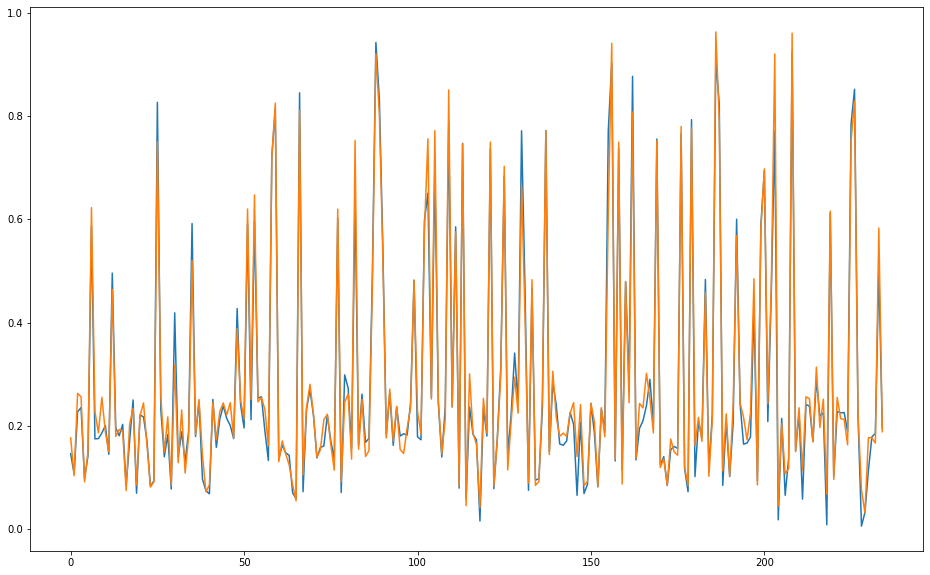

In [103]:
plt.figure(figsize=(16,10))
plt.plot(y_test)
plt.plot(predicted_price)

In [104]:
reg_loss = mean_squared_error(y_test, predicted_price)
reg_loss

0.0011177389035369914

In [105]:
y_test[0:10]

array([0.14634693, 0.10735096, 0.22725235, 0.23576871, 0.09771403,
       0.14208875, 0.58673241, 0.17503362, 0.17548185, 0.18646347])

In [106]:
predicted_price[0:10]

array([[0.17703895],
       [0.10354418],
       [0.26310575],
       [0.25636145],
       [0.09172842],
       [0.15046851],
       [0.6227917 ],
       [0.22802001],
       [0.18668601],
       [0.2552805 ]], dtype=float32)